In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl

In [2]:
import cmocean

In [3]:
from mattia import densjmd95

In [4]:
from plot_config import *

In [5]:
map_path = '/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/map1.zarr'
table_path = '/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/table1.zarr'
particle_path = '/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/'
pre = 'precalc/dic_'
tb = xr.open_zarr(table_path)

In [6]:
indf = list(np.array(tb[var][-1].chunk((9973))).astype(int) for var in ['iz','iy','ix'])
indf[0]-=1
indf = tuple(indf)
ds = xr.open_zarr('/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/bgc_tutorial.zarr')
sf = np.array(ds.S[-1])[indf]
tf = np.array(ds.Temp[-1])[indf]
t0 = 0.5
t1 = 4
s0 = 34.4
ind_bw = np.where(tf<=t0)[0]
ind_dw = np.where(np.logical_and(np.logical_and(tf>t0,sf>s0),tf<=t1))[0]
ind_iw = np.where(np.logical_and(tf>t0,sf<=s0))[0]
ind_lw = np.where(np.logical_and(np.logical_and(tf>t0,sf>s0),tf>t1))[0]
print(
    len(ind_bw),
    len(ind_dw),
    len(ind_iw),
    len(ind_lw),
)
bw = tb.isel(space = ind_bw)
dw = tb.isel(space = ind_dw)
iw = tb.isel(space = ind_iw)
lw = tb.isel(space = ind_lw)

1084 1898 2864 4350


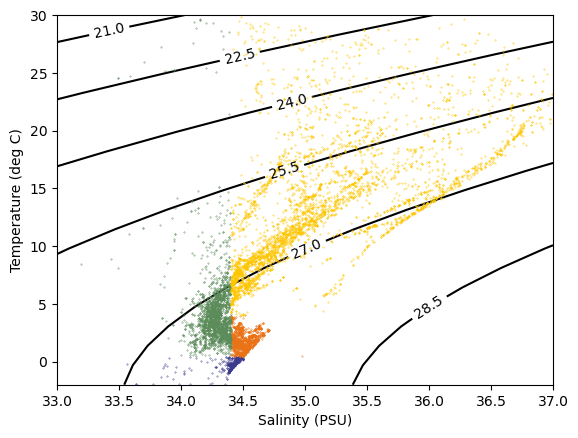

In [71]:
sss = np.linspace(33,37,20)
ttt = np.linspace(-2,30,20)
sss,ttt = np.meshgrid(sss,ttt)
dense = densjmd95(sss,ttt,0)-1000
ct = plt.contour(sss,ttt,dense,colors = 'k')
plt.clabel(ct)
for name in water:
    sel = eval('ind_'+name)
    plt.plot(sf[sel],tf[sel],'o',color = water2color[name],markersize = 0.3)
plt.xlim(33,37)
plt.ylim(-2,30)
plt.xlabel('Salinity (PSU)')
plt.ylabel('Temperature (deg C)')
plt.savefig('fig1(a)'+format)

In [68]:
repr_index = {
    'lw':1111,
    'iw':705,
    'dw':15,
    'bw':999
}

bw
dw
iw
lw


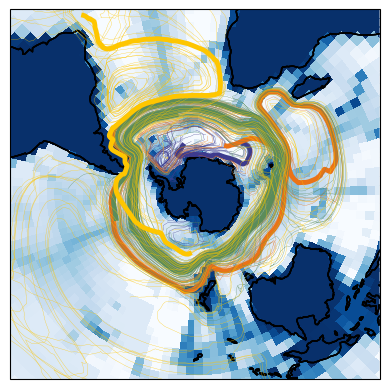

In [69]:
projection = ccrs.SouthPolarStereo()
ax = plt.axes(projection = projection)
ax.pcolormesh(ds.X,ds.Y,ds.Depth,transform = ccrs.PlateCarree(),cmap = 'Blues_r')

for name in water:
    # if name in ['dw','lw']:
    #     continue
    print(name)
    table = eval(name)
    np.random.seed(0)
    sample = np.random.randint(0,len(table.space)-1,40)
    lons = np.array(table.lon[:,sample])
    lats = np.array(table.lat[:,sample])
    xx, yy, _ = projection.transform_points(ccrs.PlateCarree(), lons, lats).T
    
    xx = xx.T
    yy = yy.T
    
    ax.plot(xx,yy,color = water2color[name],lw = 0.2)
    ind = repr_index[name]
    ax.plot(table.lon[:,ind],table.lat[:,ind],'-',lw = 3.5,transform = ccrs.PlateCarree(),color = water2color[name])
    ax.coastlines()
    ax.set_extent([-1e4, 1e4, -1000, -10], crs=ccrs.PlateCarree())
plt.savefig('fig1(b)'+format)
plt.show()

/tmp/ipykernel_3399906/2389843249.py:3: RuntimeWarning: Mean of empty slice
  sec = np.nanmean(s,axis = -1)


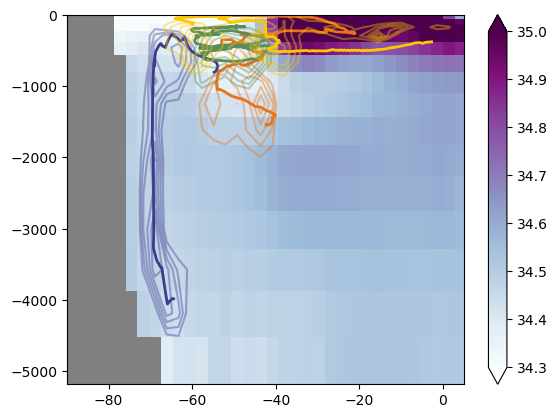

In [70]:
s = np.array(ds.S[0])
s[s==0] = np.nan
sec = np.nanmean(s,axis = -1)

norm = mpl.colors.Normalize(vmin=34.3, vmax=35.)

plt.gca().set_facecolor('grey')
ct = plt.pcolormesh(ds.Y,ds.Z,sec,cmap ='BuPu',norm =norm)
for name in water:
    table = eval(name)
    ind = repr_index[name]
    # plt.plot(table.lat[:,::100],table.dep[:,::100],color = water2color[name],lw = 0.1)
    dens = np.zeros((15,64))
    inds = tuple(np.array(i).astype(int) for i in [table.iz-1,table.iy])
    np.add.at(dens, inds, 1)
    densest = np.max(dens)
    plt.contour(ds.Y,ds.Z,dens,colors = water2color[name],levels = densest*np.array([0.5,0.6,0.7,0.8,0.9]),alpha = 0.4)
    plt.plot(table.lat[:,ind],table.dep[:,ind],'-',color = water2color[name],lw = 2)
plt.xlim([-90,5])
plt.colorbar(ct,extend = 'both')
plt.savefig('fig1(c)'+format)
plt.show()